# Project Name: Bank Customer Retirement predictions  using Support Vector Machines

## Data source: 

## Problem Statement:

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
data=pd.read_csv("Bank_Customer_retirement.csv")

In [3]:
data.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [4]:
data.shape

(500, 4)

In [5]:
data.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [6]:
data.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


## Visualizing the Data

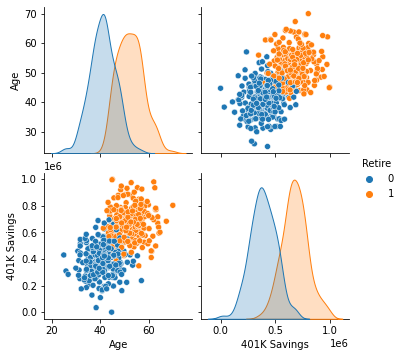

In [7]:
sns.pairplot(data=data,vars=["Age","401K Savings"],hue="Retire")

<AxesSubplot:xlabel='Retire', ylabel='count'>

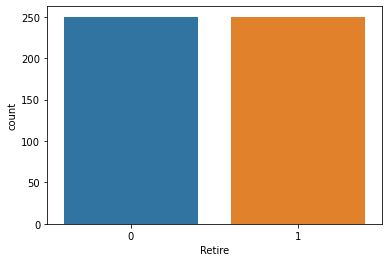

In [8]:
sns.countplot(x="Retire",data=data)

## Model Training

In [9]:
X=data.drop(["Retire","Customer ID"],axis=1)

In [10]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [11]:
y=data["Retire"]

In [12]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
X_train.shape

(400, 2)

In [16]:
X_test.shape

(100, 2)

In [17]:
y_train.shape

(400,)

In [18]:
y_test.shape

(100,)

In [19]:
from sklearn.svm import SVC

In [20]:
svc_model = SVC(gamma="auto")

In [21]:
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

In [22]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Evaluating the model

In [23]:
y_pred=svc_model.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

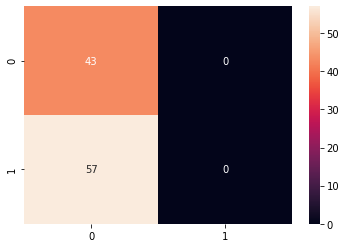

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



/Applications/anaconda3/envs/chatterbot/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improving the Model

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
svc_model=SVC(gamma="auto")

In [33]:
svc_model.fit(X_train_scaled,y_train)

SVC(gamma='auto')

In [34]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
y_pred=svc_model.predict(X_test_scaled)

In [36]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

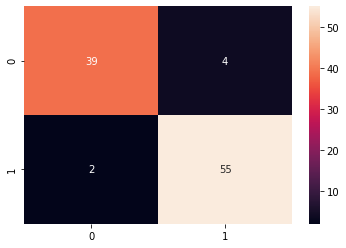

In [37]:
sns.heatmap(cm,annot=True)

In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.96      0.93      0.95        59

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



## Improving the Model - Part 2

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid={"C":[0.1,1,10,100],"gamma":[1,0.1,0.01,0.001],"kernel":["rbf"]}

In [41]:
grid_model=GridSearchCV(estimator=svc_model,param_grid=param_grid,verbose=5,refit=True)

In [42]:
grid_model.fit(X_train_scaled,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=5)

In [43]:
grid_model.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
grid_pred=grid_model.predict(X_test_scaled)

In [45]:
cm=confusion_matrix(y_test,grid_pred)

<AxesSubplot:>

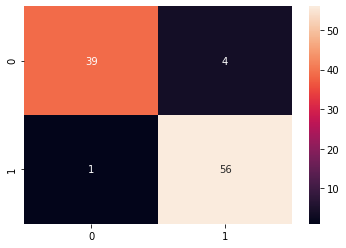

In [46]:
sns.heatmap(cm,annot=True)

In [47]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.93      0.98      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!